# **Take-Home Exam 1 (THE-1)**
## CENG403 - Spring 2025

In this THE, we will focus on implementing a Multi-layer Perceptron from scratch and in PyTorch with two tasks:

*   Task 1: Implementing your own MLP from scratch (40 pts).
*   Task 2: Implementing MLP in PyTorch (60 pts).

**Getting Ready**

You can use the following tutorials to familiarize yourself with some libraries/tools.

*   **Jupyter Notebook and Colab**:
 * https://www.dataquest.io/blog/jupyter-notebook-tutorial/
 * https://colab.research.google.com/
 * We recommend using colab.
*   **NumPy**: https://numpy.org/devdocs/user/quickstart.html
*   **PyTorch**: https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html


## **Task 1: Implement Your Own MLP (40 Points)**

In this task, you are responsible for implementing the following sub-tasks:


*   Implementing Activation Functions (10 Points)
*   Implementing Training Pipeline (30 Points)

**Note that you should implement all functions from scratch! Using PyTorch or any other libraries except for `numpy` in your implementation will be evaluated as 0 (zero).**


### **1.1 Implement forward pass for activations (5 Points)**

In this part, you are expected to implement the forward pass for the following activation functions:

 $$
\text{ReLU}(x) = \max(0, x)
$$

$$
\text{Sigmoid}(x) = \frac{1}{1 + e^{-x}}
$$

$$
\text{Tanh}(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

$$
\text{Leaky ReLU}(x) =
\begin{cases}
    x, & x \geq 0 \\
    \alpha x, & x < 0
\end{cases}
$$

$$
\text{ELU}(x) =
\begin{cases}
    x, & x \geq 0 \\
    \alpha (e^x - 1), & x < 0
\end{cases}
$$


In [112]:
import numpy as np

def relu(x):
  result = np.where(x > 0, x, 0)
  return result

def sigmoid(x):
  result = 1 / (1 + np.exp(-x))
  #####################################################
  return result

def tanh(x):
  result = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
  #####################################################
  return result

def leakyrelu(x, alpha):
  result = np.where(x >= 0, x, alpha*x)
  #####################################################
  return result

def elu(x, alpha):
  result = np.where(x >= 0, x, alpha*(np.exp(x)-1))
  #####################################################
  return result

### **1.2 Implement backward pass for activations (5 Points)**

In this part, you are expected to derive the gradients of the activation functions in Section 1.1 (you are not expected to provide your derivations here) and to implement those gradients.


In [113]:
def relu_derivate(x):
  result = np.where(x > 0, 1, 0)
  ###########################################################################
  return result

def sigmoid_derivate(x):
  sigmoid_x = 1 / (1 + np.exp(-x))
  result = sigmoid_x * (1 - sigmoid_x)
  ###########################################################################
  return result

def tanh_derivate(x):
  tanh = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
  result = 1 - tanh**2
  ###########################################################################
  return result

def leakyrelu_derivate(x, alpha):
  result = np.where(x > 0, 1, alpha)
  ###########################################################################
  return result

def elu_derivate(x, alpha):
  result = np.where(x > 0, 1, alpha * np.exp(x))
  ###########################################################################
  return result

### **1.3 Validate Implementations in Sections 1.1 and 1.2**

Run the following cell to validate/check whether your implementations in Sections 1.1 and 1.2 are correct. You will see your grade calculated for this part.

**Do not change/add any code here.**

In [114]:
import torch
import torch.nn as nn
import torch.nn.functional as F

points = 0

#define variables
x_numpy = np.random.randn(5, 5).astype(np.float32)
x_torch = torch.tensor(x_numpy, requires_grad=True)

alpha_leakyrelu = 0.3
alpha_elu = 0.5

class SimpleModel(nn.Module):
    def __init__(self, activation):
        super(SimpleModel, self).__init__()
        self.dummy_param = torch.nn.Parameter(torch.ones(1))
        self.activation = activation

    def forward(self, x):
      return self.activation(x * self.dummy_param)

# Activation functions
activations = {
    'relu': F.relu,
    'tanh': torch.tanh,
    'sigmoid': torch.sigmoid,
    'elu': lambda x: F.elu(x, alpha=alpha_elu),
    'leaky_relu': lambda x: F.leaky_relu(x, negative_slope=alpha_leakyrelu)
}

numpy_gradients = {
    'relu': relu_derivate,
    'tanh': tanh_derivate,
    'sigmoid': sigmoid_derivate,
    'elu': elu_derivate,
    'leaky_relu': leakyrelu_derivate
}

numpy_forward = {
    'relu': relu,
    'tanh': tanh,
    'sigmoid': sigmoid,
    'elu': elu,
    'leaky_relu': leakyrelu
}

# Compare gradients
for name, activation in activations.items():
    model = SimpleModel(activation)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
    output_torch = model(x_torch)

    # Compute numpy forward and gradients
    if name == 'elu':
        numpy_out = numpy_forward[name](x_numpy, alpha=alpha_elu)
        numpy_grad = numpy_gradients[name](x_numpy, alpha=alpha_elu)
    elif name == 'leaky_relu':
        numpy_out = numpy_forward[name](x_numpy, alpha=alpha_leakyrelu)
        numpy_grad = numpy_gradients[name](x_numpy, alpha=alpha_leakyrelu)
    else:
        numpy_out = numpy_forward[name](x_numpy)
        numpy_grad = numpy_gradients[name](x_numpy)

    # Compare forward pass
    print(f"Forward pass comparison for {name} activation:")
    print("Forward difference: ", np.allclose(numpy_out, output_torch.detach().numpy(), atol=1e-6))

    if np.allclose(numpy_out, output_torch.detach().numpy(), atol=1e-6): points +=1

    output_torch.sum().backward()
    torch_grad = x_torch.grad.numpy()

    # Compare gradients
    print(f"Gradient (backward pass) comparison for {name} activation :")
    print("Gradient difference: ", np.allclose(numpy_grad, torch_grad, atol=1e-6))
    if np.allclose(numpy_grad, torch_grad, atol=1e-6): points += 1

    print("-" * 30)

    #clear gradients of pytorch
    optimizer.zero_grad()
    x_torch.grad.zero_()

print("Total points:",points,"/ 10")

Forward pass comparison for relu activation:
Forward difference:  True
Gradient (backward pass) comparison for relu activation :
Gradient difference:  True
------------------------------
Forward pass comparison for tanh activation:
Forward difference:  True
Gradient (backward pass) comparison for tanh activation :
Gradient difference:  True
------------------------------
Forward pass comparison for sigmoid activation:
Forward difference:  True
Gradient (backward pass) comparison for sigmoid activation :
Gradient difference:  True
------------------------------
Forward pass comparison for elu activation:
Forward difference:  True
Gradient (backward pass) comparison for elu activation :
Gradient difference:  True
------------------------------
Forward pass comparison for leaky_relu activation:
Forward difference:  True
Gradient (backward pass) comparison for leaky_relu activation :
Gradient difference:  True
------------------------------
Total points: 10 / 10


### **1.4 Implement a Training Pipeline (30 Points)**

In this part, you should implement the following two-layer neural network for a binary classification problem (given input-output pair $(\mathbf{x}_i, y_i)$):

$$ \mathbf{z}_1 = W^1 \mathbf{x}_i + \mathbf{b}^1,$$
$$ \mathbf{h} = \textrm{relu}(\mathbf{z}_1),$$
$$ z_2 = W^2 \mathbf{h} + \mathbf{b}^2,$$
$$ p_i = \textrm{sigmoid}(z_2),$$

where we assume that relu() and sigmoid() are applied elementwise to their arguments. Note that $z_2$ is a scalar variable.

You should use the binary cross-entropy loss ($N$ denoting the number of samples):
$$ L_{BCE} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log (p_i) + (1 - y_i) \log (1 - p_i) \right].$$

You should use gradient descent to update the parameters:
$$ w_{ij} = w_{ij} - \eta \frac{\partial L}{\partial w_{ij}} ,$$ where $\eta$ is the learning rate.


In [115]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Forward Propagation
def forward_propagation(X, W1, b1, W2, b2):
    ###########################################################################
    # -- Z1: the output of the first layer
    Z1 = np.dot(X, W1) + b1
    # -- h: the output of the first layer after relu
    h = np.maximum(0, Z1)
    # -- Z2: the output of the second layer
    Z2 = np.dot(h, W2) + b2
    # -- p_i: the output of second layer after sigmoid
    p_i = sigmoid(Z2)
    ###########################################################################

    # do not modify following lines
    cache = (Z1, h, Z2, p_i)
    return p_i, cache

# Loss Function (Binary Cross-Entropy)
def compute_loss(y, p_i):
    ###########################################################################
    N = y.shape[0]
    result = -1/N * np.sum((y * np.log(p_i) + ((1 - y) * np.log(1 - p_i))))
    ###########################################################################
    return result

# Backpropagation
def backward_propagation(X, y, cache, W2):
    Z1, h, Z2, p_i = cache # Do not modify

    N = y.shape[0]
    ###########################################################################
    # -- dW2 and b2 are gradients of weight matrix and bias for the second layer
    dZ2 = p_i - y
    dW2 = np.dot(h.T, dZ2) / N
    db2 = np.sum(dZ2, axis=0) / N

    # -- dW1 and b1 are gradients of weight matrix and bias for the first layer
    dh = np.dot(W2, dZ2.T)
    dZ1 = dh.T * (Z1 > 0)
    dW1 = np.dot(X.T, dZ1) / N
    db1 = np.sum(dZ1, axis=0) / N
    ###########################################################################

    # do not modify following part
    gradients = (dW1, db1, dW2, db2)

    return gradients

# Update Parameters
def update_parameters(W1, b1, W2, b2, gradients, learning_rate):
    dW1, db1, dW2, db2 = gradients # Do not modify

    ###########################################################################
    # -- W1 and b1 are the weight matrix and bias for the first layer
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    # -- W2 and b2 are the weight matrix and bias for the second layer
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    ###########################################################################

    # do not modify following part
    return W1, b1, W2, b2


### **1.5 Validate Implementation in Section 1.4**

This part is only to validate your implementation in Section 1.4 and see your grade.

**Do not modify/add any code here!**

In [116]:
grades_1_5 = 0
# DO NOT modify here
# XOR Dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Hyperparameters
input_size = 2
hidden_size = 3
output_size = 1
learning_rate = 0.01

# --- PyTorch Model for Weight Sharing ---
class TwoLayerMLP(nn.Module):
    def __init__(self):
        super(TwoLayerMLP, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = torch.sigmoid(self.output(x))
        return x

# Instantiate Model
model = TwoLayerMLP()

# Extract Weights from PyTorch and Share with NumPy
W1 = model.hidden.weight.detach().numpy().T.copy()  # Transpose to match NumPy's dot product order
b1 = model.hidden.bias.detach().numpy().reshape(1, -1).copy()
W2 = model.output.weight.detach().numpy().T.copy()
b2 = model.output.bias.detach().numpy().reshape(1, -1).copy()

# Forward Propagation (NumPy)
p_i, cache = forward_propagation(X, W1, b1, W2, b2)

# Compute Loss (NumPy)
loss_numpy = compute_loss(y, p_i)

# Backpropagation (NumPy)
gradients = backward_propagation(X, y, cache, W2)

# --- PyTorch Verification ---
print("\n--- PyTorch Verification ---")

# Convert Data to Torch Tensors
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y)

# Forward Pass in PyTorch
output = model(X_tensor)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_torch = criterion(output, y_tensor)
optimizer.zero_grad()
loss_torch.backward()
optimizer.step()


W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, gradients, learning_rate)

# Forward Comparison
print("Forward comparison:")
print("Forward difference:", np.allclose(p_i, output.detach().cpu().numpy(), atol=1e-6))
if np.allclose(p_i, output.detach().cpu().numpy(), atol=1e-6):
  grades_1_5 += 5.

# Loss Comparison
print("Loss comparison:")
print("Loss difference:", np.allclose(loss_numpy, loss_torch.detach().cpu().numpy(), atol=1e-6))
if np.allclose(loss_numpy, loss_torch.detach().cpu().numpy(), atol=1e-6):
  grades_1_5 += 5.

# Backward Comparison
print("\nGradients Comparison:")
print("dW1 difference:", np.allclose(gradients[0], model.hidden.weight.grad.numpy().T, atol=1e-6))
if np.allclose(gradients[0], model.hidden.weight.grad.numpy().T, atol=1e-6):
  grades_1_5 += 2.5
print("db1 difference:", np.allclose(gradients[1], model.hidden.bias.grad.numpy().reshape(1, -1), atol=1e-6))
if np.allclose(gradients[1], model.hidden.bias.grad.numpy().reshape(1, -1), atol=1e-6):
  grades_1_5 += 2.5
print("dW2 difference:", np.allclose(gradients[2], model.output.weight.grad.numpy().T, atol=1e-6))
if np.allclose(gradients[2], model.output.weight.grad.numpy().T, atol=1e-6):
  grades_1_5 += 2.5
print("db2 difference:", np.allclose(gradients[3], model.output.bias.grad.numpy().reshape(1, -1), atol=1e-6))
if np.allclose(gradients[3], model.output.bias.grad.numpy().reshape(1, -1), atol=1e-6):
  grades_1_5 += 2.5

# Parameter Update Comparison
print("\nParameter Comparison after updating:")
print("W1 difference:", np.allclose(W1, model.hidden.weight.detach().numpy().T, atol=1e-6))
if np.allclose(W1, model.hidden.weight.detach().numpy().T, atol=1e-6):
  grades_1_5 += 2.5
print("b1 difference:", np.allclose(b1, model.hidden.bias.detach().numpy().reshape(1, -1), atol=1e-6))
if np.allclose(b1, model.hidden.bias.detach().numpy().reshape(1, -1), atol=1e-6):
  grades_1_5 += 2.5
print("W2 difference:", np.allclose(W2, model.output.weight.detach().numpy().T, atol=1e-6))
if np.allclose(W2, model.output.weight.detach().numpy().T, atol=1e-6):
  grades_1_5 += 2.5
print("b2 difference:", np.allclose(b2, model.output.bias.detach().numpy().reshape(1, -1), atol=1e-6))
if np.allclose(b2, model.output.bias.detach().numpy().reshape(1, -1), atol=1e-6):
  grades_1_5 += 2.5

print("Total points:", grades_1_5, "/ 30.0")


--- PyTorch Verification ---
Forward comparison:
Forward difference: True
Loss comparison:
Loss difference: True

Gradients Comparison:
dW1 difference: True
db1 difference: True
dW2 difference: True
db2 difference: True

Parameter Comparison after updating:
W1 difference: True
b1 difference: True
W2 difference: True
b2 difference: True
Total points: 30.0 / 30.0


## **Task 2: Implement MLP in PyTorch (60 Points)**

In this task, you are expected to implement a training, validation and testing pipeline using PyTorch.

You will work with an imbalanced version of the well-known MNIST dataset which we've prepared for you. In this dataset, there are three splits: train, validation and test. Each split contains 10 directories and each directory represents one class. Therefore, there are 10 classes in total.


### **2.1 Download Dataset**

Your dataset is an imbalanced version of MNIST. Run the following code to download and extract dataset.

In [117]:
!wget -O mnist_png.zip https://github.com/Bedrettin-Cetinkaya/imbalancedMNIST/raw/refs/heads/main/mnist_png.zip
!unzip mnist_png.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


### **2.2 Implement Data Loader (5 Points)**

In this task, you should create a custom dataset class (`MNISTCustomDataset`) to load MNIST images from a directory structure. The dataset reads images, extracts labels from folder names, and applies transformations like converting to tensors and normalization.

We use `DataLoader`s to efficiently load data in batches:

*    Training `DataLoader`: Loads shuffled batches for better model learning.
*    Validation & Test `DataLoader`s: Load images without shuffling for consistent evaluation

In [118]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os
import glob

class MNISTCustomDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform

        #####################################################
        self.images = []  # List to store image file paths
        self.labels = []  # List to store corresponding labels

        for label in sorted(os.listdir(data_dir)):
            label_dir = os.path.join(data_dir, label)
            self.labels.extend([int(label)] * len(os.listdir(label_dir)))
            for file in os.listdir(label_dir):
                self.images.append(os.path.join(label_dir, file))
        #####################################################

    def __len__(self):
        #####################################################
        return len(self.images)
        #####################################################

    def __getitem__(self, idx):
        #####################################################
        label = self.labels[idx]
        image = Image.open(self.images[idx])
        #####################################################

        if self.transform:
            image = self.transform(image)

        return image, label


# Define transformations
transform_train = transforms.Compose([
    #####################################################
    transforms.ToTensor(),
    # Flatten the images from 2D to 1D
    transforms.Lambda(lambda x: x.view(-1))
    #####################################################
])

transform_validationAndtest = transforms.Compose([
    #####################################################
    transforms.ToTensor(),
    # Flatten the images from 2D to 1D
    transforms.Lambda(lambda x: x.view(-1))
    #####################################################
])

#####################################################
# Provide the correct path for the dataset splits
data_dir_training = "mnist_png/training"
data_dir_validation = "mnist_png/validation"
data_dir_testing = "mnist_png/testing"
#####################################################

# Create dataset instance
train_dataset = MNISTCustomDataset(data_dir=data_dir_training, transform=transform_train)
validation_dataset = MNISTCustomDataset(data_dir=data_dir_validation, transform=transform_validationAndtest)
test_dataset = MNISTCustomDataset(data_dir=data_dir_testing, transform=transform_validationAndtest)

# Create DataLoader
batch_size = 64  # set your batch size
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=10000, shuffle=False)

# Check DataLoaders
images, labels = next(iter(train_loader))
print(f"Train Batch shape: {images.shape}, Labels shape: {labels.shape}")

images, labels = next(iter(val_loader))
print(f"Validation Batch shape: {images.shape}, Labels shape: {labels.shape}")

images, labels = next(iter(test_loader))
print(f"Test Batch shape: {images.shape}, Labels shape: {labels.shape}")

Train Batch shape: torch.Size([64, 784]), Labels shape: torch.Size([64])
Validation Batch shape: torch.Size([64, 784]), Labels shape: torch.Size([64])
Test Batch shape: torch.Size([10000, 784]), Labels shape: torch.Size([10000])


### **2.3 Implement Model (5 Points)**
In this task, you are expected to implement CustomMLP class. There is no restriction in MLP architecture.However, **You should use at least one dropout layer!**

In [119]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CustomMLP(nn.Module):
    def __init__(self, input_size, output_size, dropout_rate):
        super(CustomMLP, self).__init__()

        #####################################################
        # Input layer: #input_size node
        # Hidden layer 1: #hidden_layer_node nodes
        # Hidden layer 2: #hidden_layer_node nodes
        hidden_layer_node = 128
        self.layer1 = nn.Linear(input_size, hidden_layer_node)

        # Hidden layer 2
        # Dropout enabled
        self.layer2 = nn.Linear(hidden_layer_node, hidden_layer_node)
        self.dropout = nn.Dropout(dropout_rate)

        # Output layer: #output_size nodes
        self.output_layer = nn.Linear(hidden_layer_node, output_size)
        #####################################################

    def forward(self, x):
        #####################################################
        x = F.leaky_relu(self.layer1(x))
        x = F.leaky_relu(self.layer2(x))
        x = self.dropout(x)
        x = self.output_layer(x)
        return x
        #####################################################

#####################################################
# Define the following model parameters
input_size = 28 * 28  # MNIST images are 28x28
output_size = 10  # MNIST has 10 classes
#####################################################

# Create model instance
model = CustomMLP(input_size, output_size, 0.5)

# Print model summary
print(model)

CustomMLP(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=128, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (output_layer): Linear(in_features=128, out_features=10, bias=True)
)


###**2.4 Define Your Optimizer and Loss function**
This task involves setting up a loss function and an optimizer for training a model. The loss function measures prediction accuracy. The optimizer, such as SGD or Adam, updates model weights based on the loss. Key parameters like learning rate and weight decay should be set appropriately. The model must also be moved to the correct device (CPU/GPU) before training.

In [120]:
import torch.optim as optim

#####################################################
# Define a loss function
loss_function = nn.CrossEntropyLoss()
#####################################################

#####################################################
# Set your learning_rate, weight_decay or other optimizer-related parameters.
learning_rate = 0.001
weight_decay = 0.0001
#####################################################

#####################################################
# Replace with your model instance
model = CustomMLP(input_size, output_size, 0.5)
#####################################################

#####################################################
# Pass model to device (CPU or GPU)
if torch.cuda.is_available():
  print("GPU is available")
else:
  print("GPU is not available, using CPU instead")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
#####################################################

#####################################################
# Define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
#####################################################

# Print optimizer and loss function
print("Loss Function:", loss_function)
print("Optimizer:", optimizer)

GPU is available
Loss Function: CrossEntropyLoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0.0001
)


###**2.5 Optional Steps**
You can use here for additional codes/implementations if you need.

In [121]:
# You can use this cell for additional steps if you need.
import csv
import time

def log_to_file(epoch, train_loss, val_loss, val_accuracy, filename="training_log.csv"):
    # Check if the file exists. If not, create the file and write the headers
    file_exists = False
    try:
        with open(filename, 'r'):
            file_exists = True
    except FileNotFoundError:
        pass

    with open(filename, 'a', newline='') as csvfile:
        writer = csv.writer(csvfile)

        # Write headers only if the file is new
        if not file_exists:
            writer.writerow(['Run ID', 'Epoch', 'Training Loss', 'Validation Loss', 'Validation Accuracy', 'Timestamp'])

        # Create a unique run ID (timestamp)
        run_id = time.strftime('%Y-%m-%d_%H-%M-%S')

        # Append the new row with results
        writer.writerow([run_id, epoch + 1, train_loss, val_loss, val_accuracy, time.strftime('%Y-%m-%d %H:%M:%S')])


# Plot training accuraccies per epoch
def plot_accuracies(train_accuracies, val_accuracies, num_of_epochs):
    #####################################################
    # plot the training and validation accuracy
    # epoch numbers
    x_axis = np.arange(1, num_of_epochs + 1)

    # train and val loss values
    y_axis_train = np.array(train_accuracies)
    y_axis_val = np.array(val_accuracies)

    plt.figure()
    plt.plot(x_axis, y_axis_train, label='Training Accuracy', marker='o')
    plt.plot(x_axis, y_axis_val, label='Validation Accuracy', marker='s')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy vs. Epoch')
    #####################################################
    plt.legend()
    plt.show()


def plot_confusion_matrix(confusion_matrix, title = 'Confusion Matrix of Validation Data'):
  plt.imshow(confusion_matrix, cmap='Blues')
  plt.colorbar()
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title(title)
  for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
      plt.text(j, i, str(confusion_matrix[i, j]), ha='center', va='center', color='black')
  plt.show()

### **2.6 Implement Training Pipeline (10 Points)**

This task involves implementing training and validation loops for a model.

* The `train()` function:
 * Iterates through the training data (`train_loader`).
 * For each batch, extracts images and labels, moves them to the appropriate device (CPU/GPU), performs a forward pass (calculates predictions and loss), and performs the backward pass (computes gradients and updates the model weights).
 * Returns the average training loss.

* The `validate()` function:
 * Iterates through the validation data (`val_loader`) without updating the model weights (using `torch.no_grad()`).
 * Computes predictions, loss, and calculates accuracy by comparing predictions with true labels.
 * Returns the average validation loss and accuracy.


* These functions should be called in a loop for multiple epochs. You need to store and print the loss and accuracy values for both training and validation after each epoch to track model performance.

In [122]:
def train(model, train_loader, optimizer, loss_function, device):

    # get the model to training mode
    model.train()
    total_loss = 0
    correct = 0

    for batch in train_loader:
        #####################################################
        # get images and their labels from the batch
        images, labels = batch

        # pass your tensor to your device (CPU or GPU)
        images, labels = images.to(device), labels.to(device)
        #####################################################

        #####################################################
        # Implement forward pass
        outputs = model(images)

        # Implement backward pass
        # Compute loss
        loss = loss_function(outputs, labels)
        total_loss += loss.item()
        #####################################################

        # Calculate accuracy
        # Compare predictions with labels
        values, predictedLabels = torch.max(outputs.data, 1)
        correct += torch.eq(predictedLabels, labels).sum().item()

        #####################################################
        # Implement optimization step
        # Clear gradients
        optimizer.zero_grad()
        # Backpropagate
        loss.backward()
        # Update weights
        optimizer.step()
        #####################################################
    accuracy = correct / len(train_loader.dataset) * 100
    return total_loss / len(train_loader), accuracy

def validate(model, val_loader, loss_function, device, is_last_epoch = False):

    # get the model to evaluation mode
    model.eval()
    total_loss = 0
    correct = 0
    predictions = []
    true_labels = []

    with torch.no_grad():
        for batch in val_loader:
            #####################################################
            # extract images and label from batch
            images, labels = batch

            # pass your tensor to your device(CPU/GPU)
            images, labels = images.to(device), labels.to(device)
            #####################################################

            #####################################################
            # Implement validation forward pass
            outputs = model(images)
            #####################################################

            #####################################################
            # Compute loss
            loss = loss_function(outputs, labels)
            total_loss += loss.item()

            # Calculate accuracy
            # Compare predictions with labels
            values, predictedLabels = torch.max(outputs.data, 1)
            correct += torch.eq(predictedLabels, labels).sum().item()

            if(is_last_epoch):
              predictions.extend(predictedLabels)
              true_labels.extend(labels)
            #####################################################

    accuracy = correct / len(val_loader.dataset) * 100
    return total_loss / len(val_loader), accuracy, predictions, true_labels

#####################################################
# Call train and validate functions in a loop for multiple epochs
epochs = 20
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
val_predictions = []
val_true_labels = []
for epoch in range(epochs):
  train_average_loss, train_accuracy = train(model, train_loader, optimizer, loss_function, device)
  train_losses.append(train_average_loss)
  train_accuracies.append(train_accuracy)

  val_average_loss, val_accuracy, val_prediction, val_label = validate(model, val_loader, loss_function, device, is_last_epoch = (epoch == (epochs - 1)))
  val_losses.append(val_average_loss)
  val_accuracies.append(val_accuracy)
  val_predictions = val_prediction
  val_true_labels = val_label
  # Store loss value and accuracy of training and validation data for each epoch.
  # log_to_file(epoch, train_average_loss, val_average_loss, val_accuracy)

### **2.7 Plot Loss Curves, Confusion Matrix (10 Points and Report Test Accuracy)**
In this task, you should plot both the training and validation loss versus the epoch in a single graph. Additionally, you should compute the confusion matrix for the validation data using **only NumPy. Using a pre-built library for computing confusion matrix is not allowed.** You should also compute test accuracy.












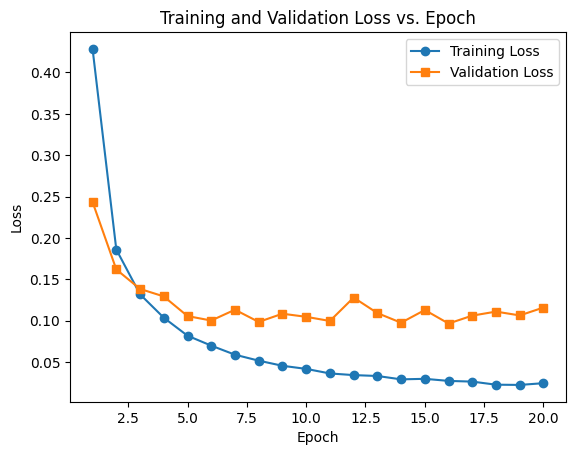

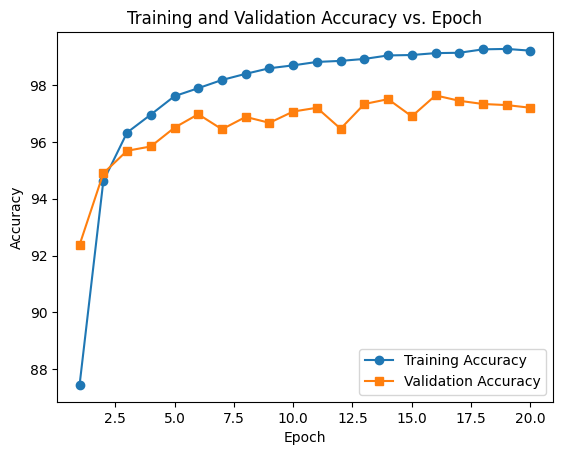

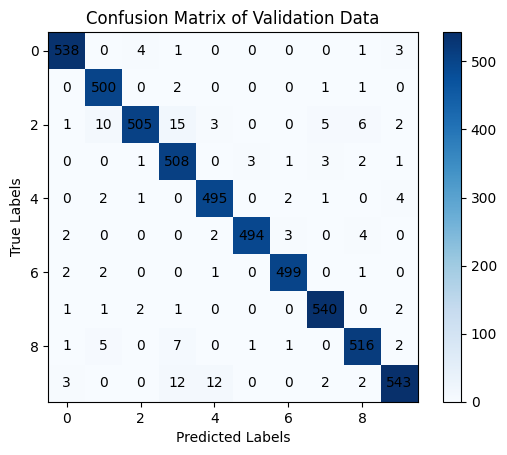



Test Accuracy: 97.11%
Last Training Accuracy: 99.21%
Last Validation Accuracy: 97.20%


In [123]:
import matplotlib.pyplot as plt


def plot_loss(train_losses, val_losses, num_of_epochs):
    # train_losses = [] # List to store training losses for each epoch
    # val_losses = []   # List to store validation losses for each epoch

    #####################################################
    # plot the training and validation loss
    # epoch numbers
    x_axis = np.arange(1, num_of_epochs + 1)

    # train and val loss values
    y_axis_train = np.array(train_losses)
    y_axis_val = np.array(val_losses)

    plt.figure()
    plt.plot(x_axis, y_axis_train, label='Training Loss', marker='o')
    plt.plot(x_axis, y_axis_val, label='Validation Loss', marker='s')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss vs. Epoch')
    #####################################################
    plt.legend()
    plt.show()

def compute_confusion_matrix(predictions, true_labels, num_classes=10):
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)
    # predictions = []   # Store model predictions
    # true_labels = []   # Store true labels

    #####################################################
    # compute confusion matrix using only NumPy
    for i in range(len(predictions)):
      confusion_matrix[true_labels[i], predictions[i]] += 1
    #####################################################

    return confusion_matrix

def report_accuracy(test_loader, model):
    correct = 0
    total = 0
    total_loss = 0
    predictions = []
    true_labels = []
    with torch.no_grad():
        model.eval()
        for batch in test_loader:
          #####################################################
          # get images and their labels from batch
          images, labels = batch

          # pass your tensor to your device(CPU/GPU)
          images, labels = images.to(device), labels.to(device)

          # Implement validation forward pass
          outputs = model(images)

          # Compute loss
          loss = loss_function(outputs, labels)
          total_loss += loss.item()

          # Calculate accuracy
          values, predictedLabels = torch.max(outputs.data, 1)
          correct += torch.eq(predictedLabels, labels).sum().item()
          total += labels.size(0)
          #####################################################

          predictions.extend(predictedLabels)
          true_labels.extend(labels)

    accuracy = (correct / total) * 100
    return total_loss / len(test_loader), accuracy, predictions, true_labels

# call plot_loss and compute_confusion matrix function with appropriate parameters
plot_loss(train_losses, val_losses, epochs)
print()
plot_accuracies(train_accuracies, val_accuracies, epochs)
print()

# Predictions and labels come from only the validation of the last epoch
confusion_matrix = compute_confusion_matrix(val_predictions, val_true_labels)
plot_confusion_matrix(confusion_matrix)
print()

test_loss, test_accuracy, predictions, true_labels = report_accuracy(test_loader, model)
last_train_accuracy = train_accuracies[-1]
last_val_accuracy = val_accuracies[-1]
print(f"\nTest Accuracy: {test_accuracy:.2f}%")
print(f"Last Training Accuracy: {last_train_accuracy:.2f}%")
print(f"Last Validation Accuracy: {last_val_accuracy:.2f}%")


### **2.8 Finetune Your Model (30 Points)**

* Search a better **learning rate** and **dropout rate** on validation data. In this search, you are expected to use all possible combinations of the given learning rates and dropout rates. For each combination, you should report validation accuracy. **Do not use any external library for hyper-parameter optimization!**

* For the best parameters, report training, validation and test accuracy values.  

* **Discuss your results** with respect to overfitting/underfitting and the impact of the hyper-parameters.

### **2.8.1 Hyperparameter Optimization (10 points)**
In this part, you should perform hyperparameter optimization using all possible combinations (grid-search) of the given learning rates and dropout rates. For each combination, you should retrain your model from scratch and store the loss and accuracy of validation data. **All remaining settings/parameters should be fixed, except for the learning rate and dropout rate.**

Running with learning rate 0.0001, and dropout rate 0, number of epochs 20



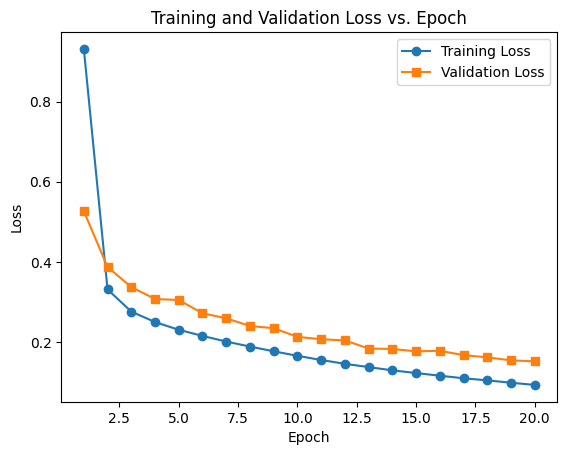

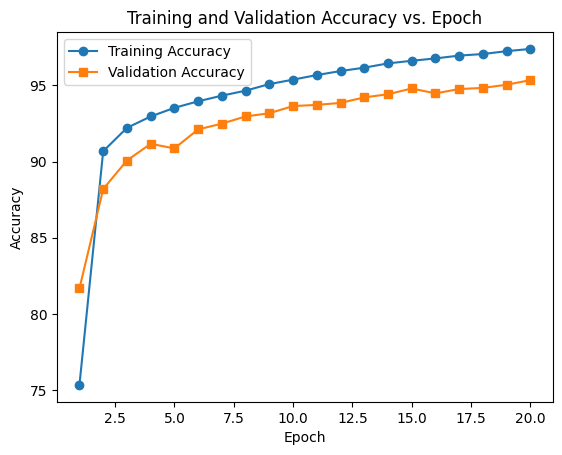

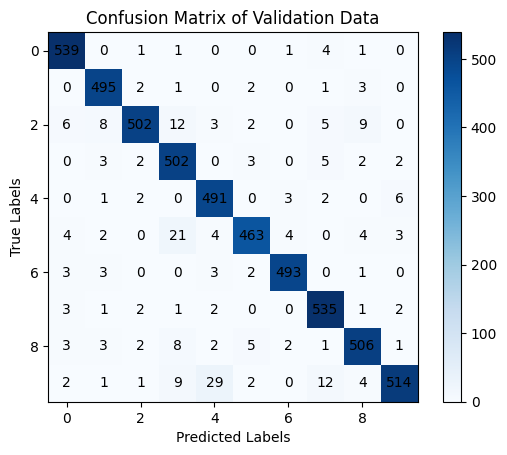



Test Accuracy: 95.46%
Last Training Accuracy: 97.39%
Last Validation Accuracy: 95.35%


-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------


Running with learning rate 0.0001, and dropout rate 0.1, number of epochs 20



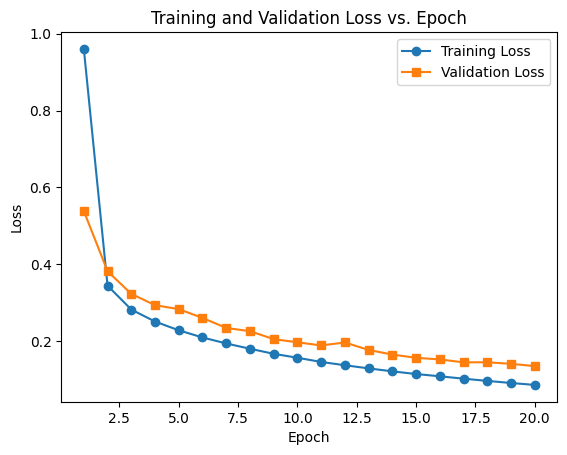

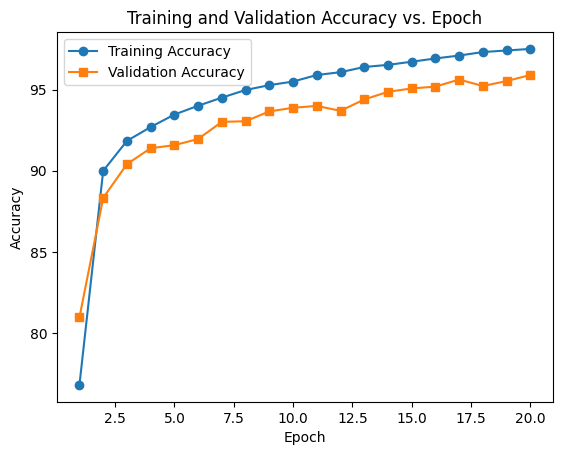

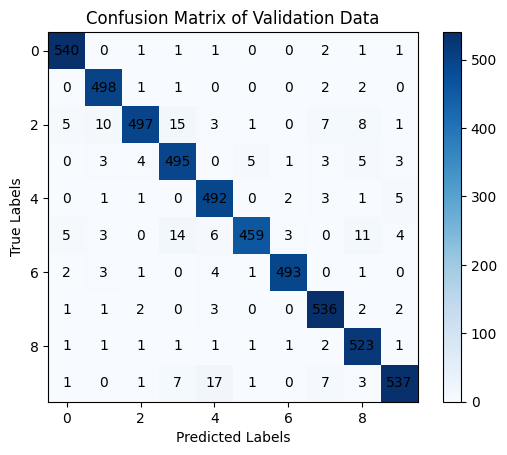



Test Accuracy: 96.02%
Last Training Accuracy: 97.52%
Last Validation Accuracy: 95.91%


-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------


Running with learning rate 0.0001, and dropout rate 0.2, number of epochs 20



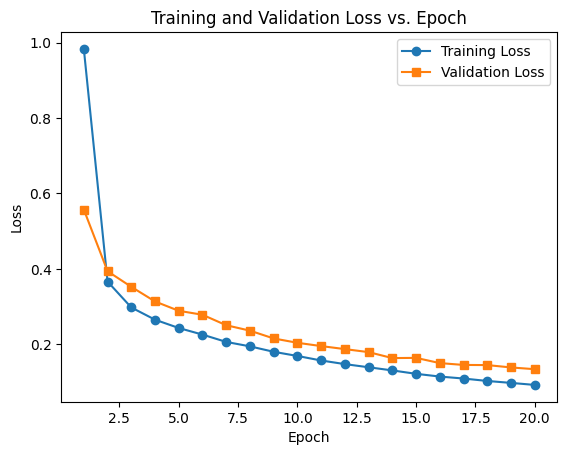

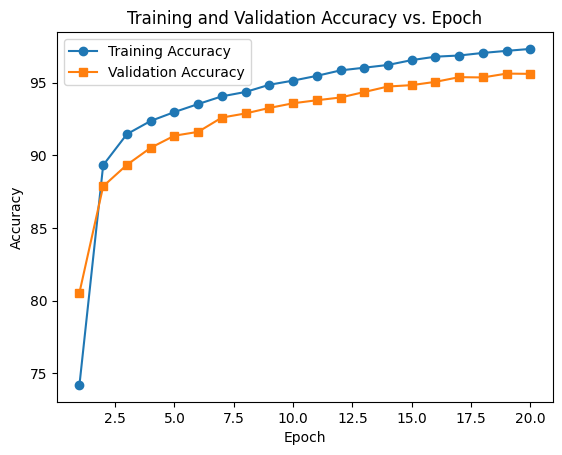

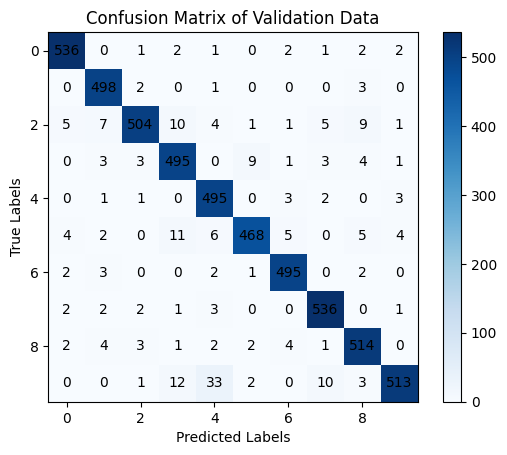



Test Accuracy: 95.74%
Last Training Accuracy: 97.33%
Last Validation Accuracy: 95.61%


-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------


Running with learning rate 0.0001, and dropout rate 0.5, number of epochs 20



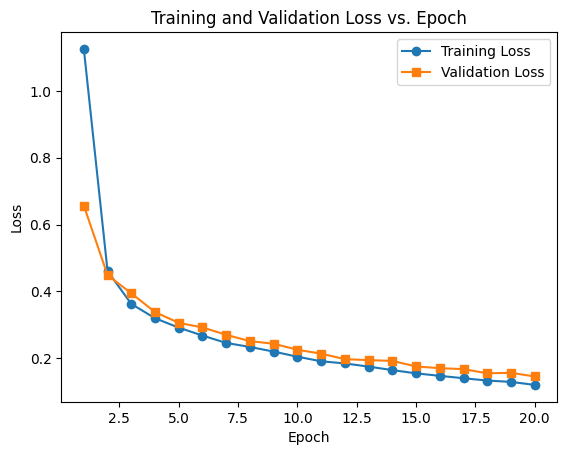

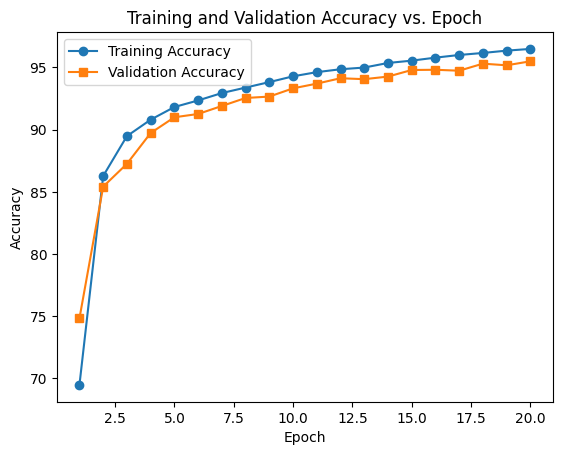

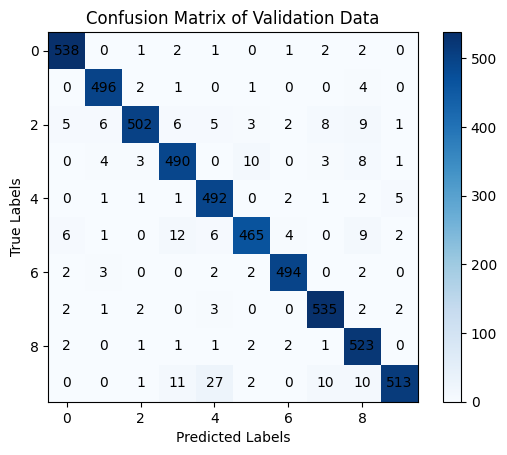



Test Accuracy: 95.63%
Last Training Accuracy: 96.49%
Last Validation Accuracy: 95.50%


-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------


Running with learning rate 0.0001, and dropout rate 0.8, number of epochs 20



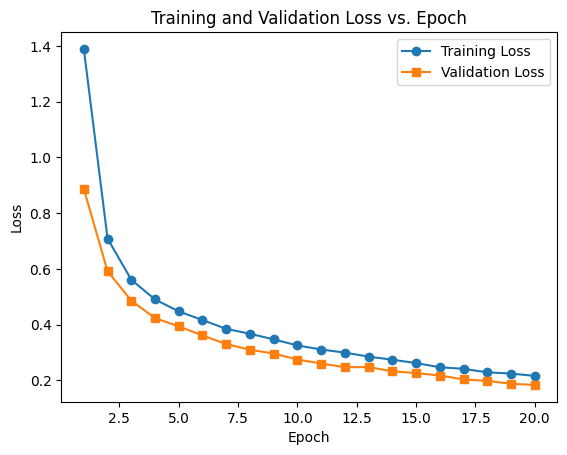

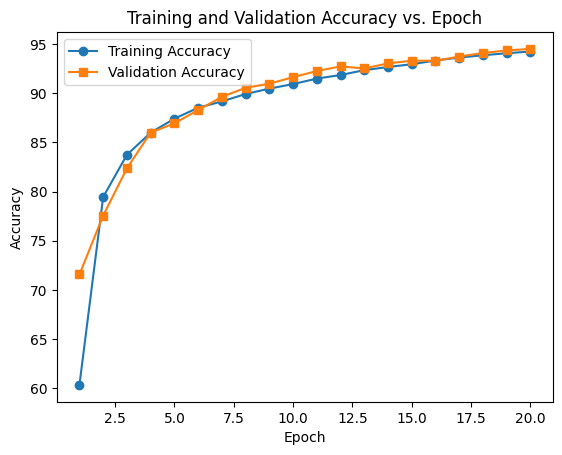

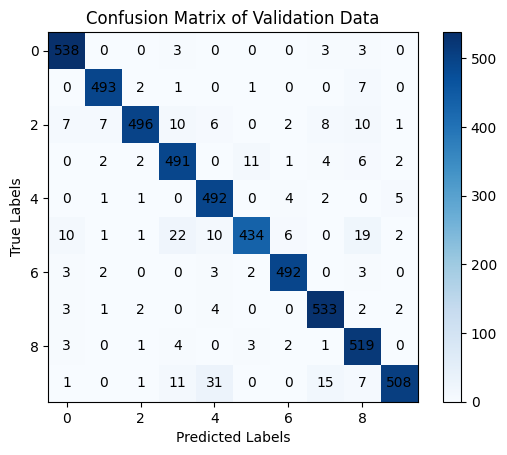



Test Accuracy: 94.48%
Last Training Accuracy: 94.25%
Last Validation Accuracy: 94.51%


-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------


Running with learning rate 0.001, and dropout rate 0, number of epochs 20



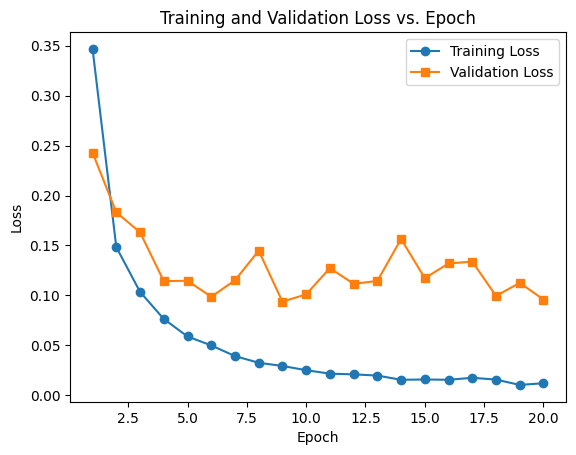

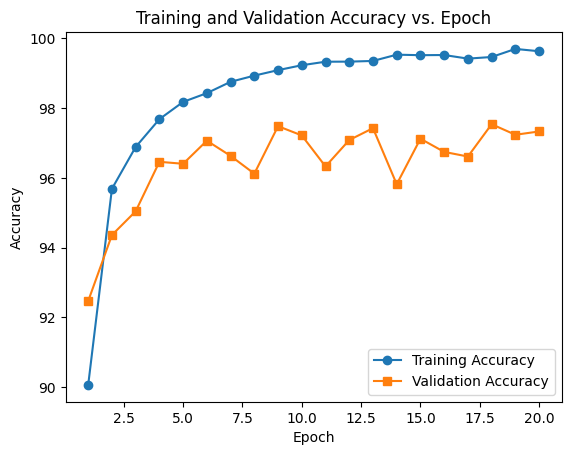

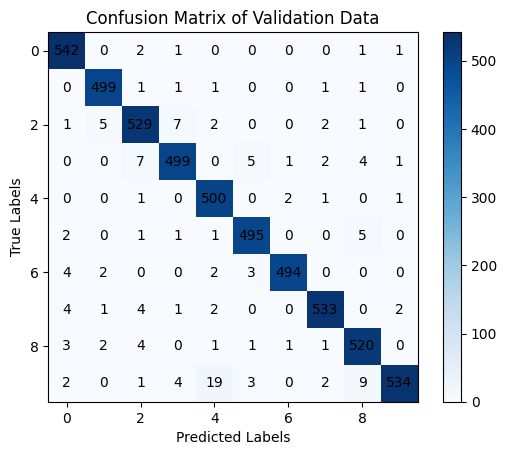



Test Accuracy: 97.27%
Last Training Accuracy: 99.63%
Last Validation Accuracy: 97.33%


-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------


Running with learning rate 0.001, and dropout rate 0.1, number of epochs 20



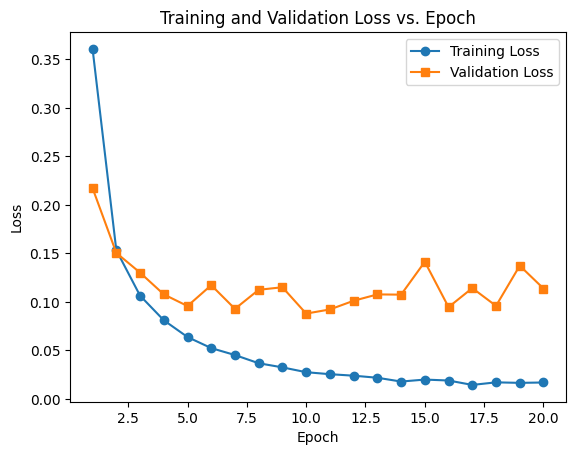

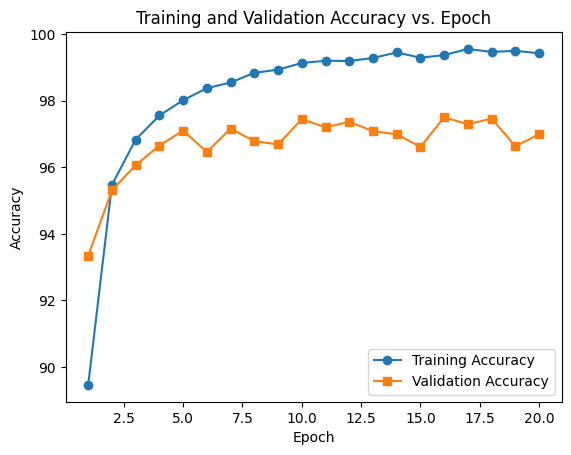

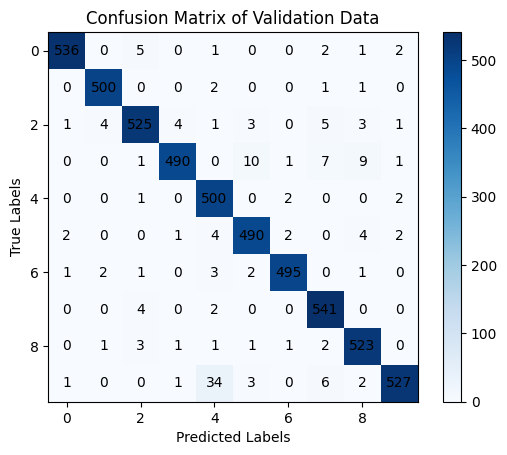



Test Accuracy: 97.33%
Last Training Accuracy: 99.43%
Last Validation Accuracy: 96.99%


-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------


Running with learning rate 0.001, and dropout rate 0.2, number of epochs 20



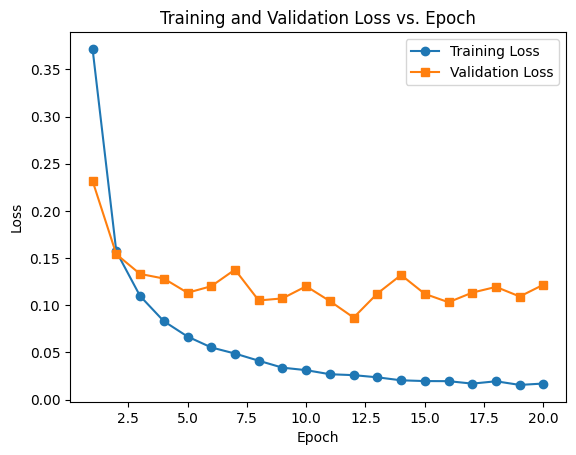

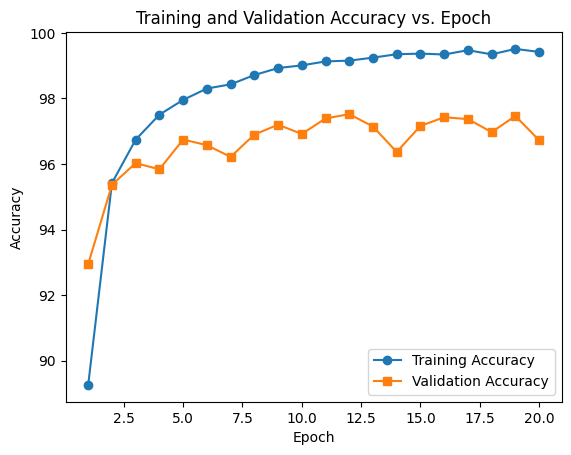

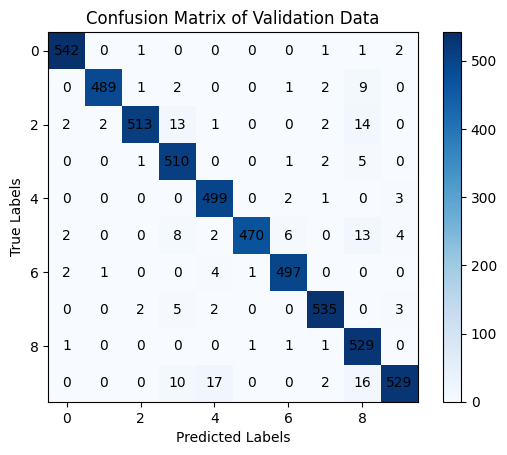



Test Accuracy: 96.77%
Last Training Accuracy: 99.42%
Last Validation Accuracy: 96.73%


-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------


Running with learning rate 0.001, and dropout rate 0.5, number of epochs 20



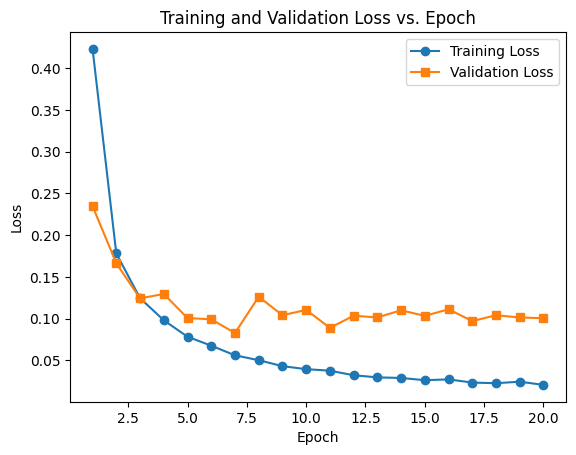

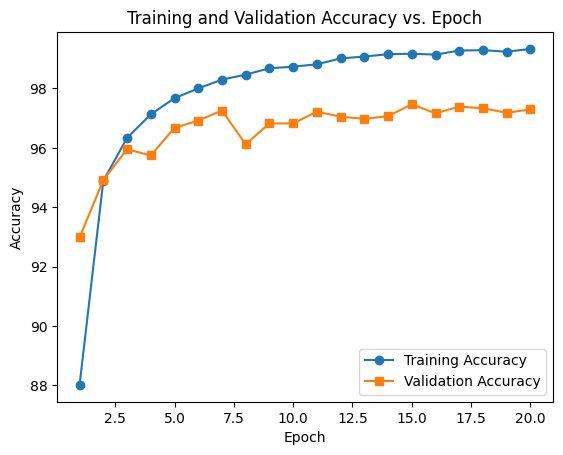

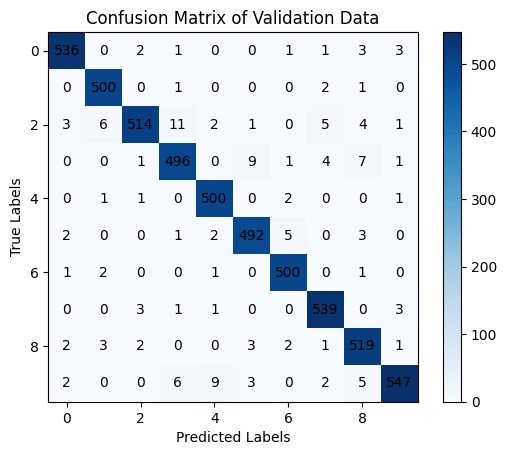



Test Accuracy: 97.43%
Last Training Accuracy: 99.33%
Last Validation Accuracy: 97.29%


-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------


Running with learning rate 0.001, and dropout rate 0.8, number of epochs 20



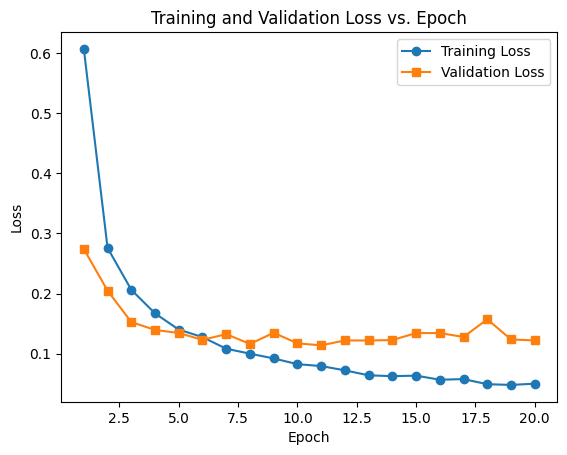

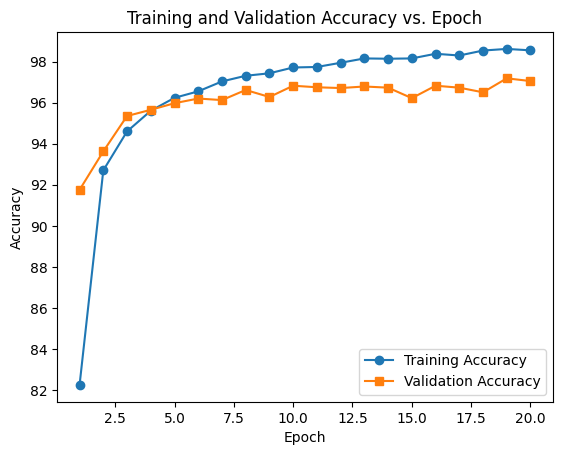

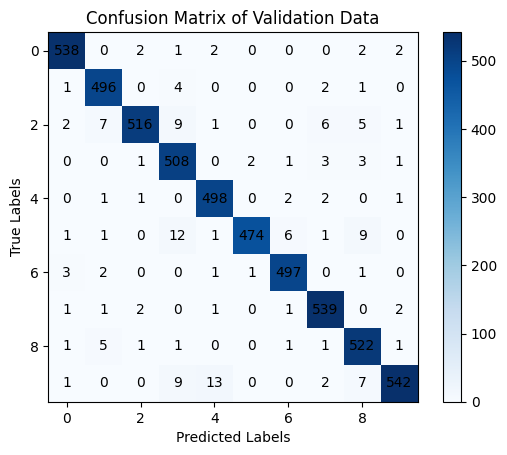



Test Accuracy: 97.16%
Last Training Accuracy: 98.54%
Last Validation Accuracy: 97.05%


-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------


Running with learning rate 0.01, and dropout rate 0, number of epochs 20



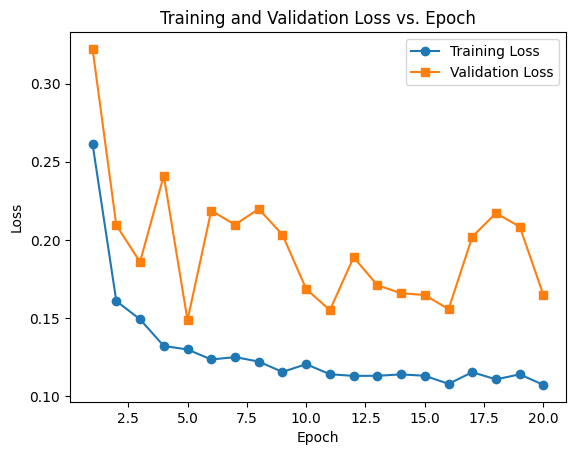

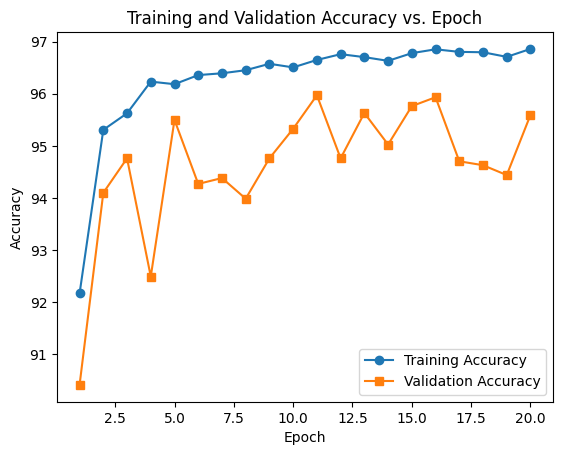

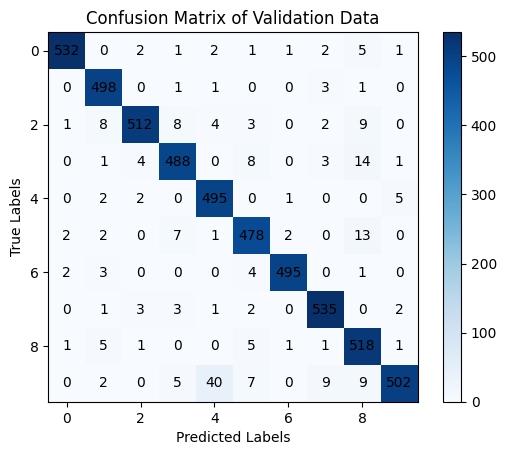



Test Accuracy: 96.10%
Last Training Accuracy: 96.86%
Last Validation Accuracy: 95.59%


-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------


Running with learning rate 0.01, and dropout rate 0.1, number of epochs 20



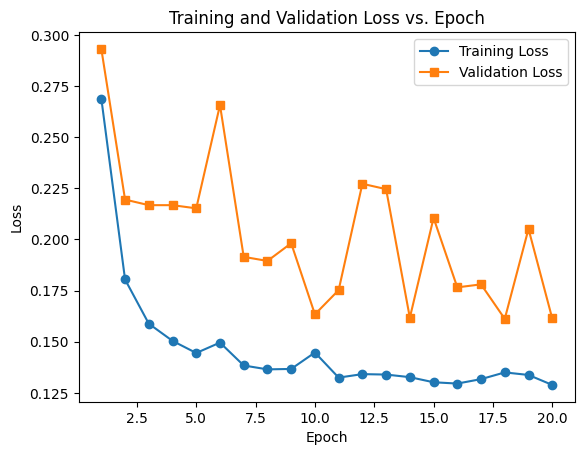

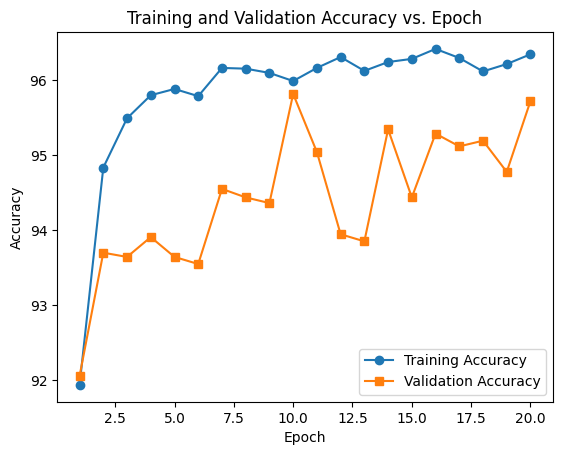

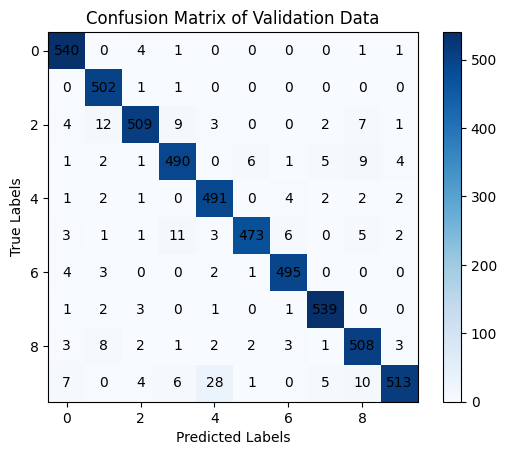



Test Accuracy: 95.77%
Last Training Accuracy: 96.35%
Last Validation Accuracy: 95.72%


-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------


Running with learning rate 0.01, and dropout rate 0.2, number of epochs 20



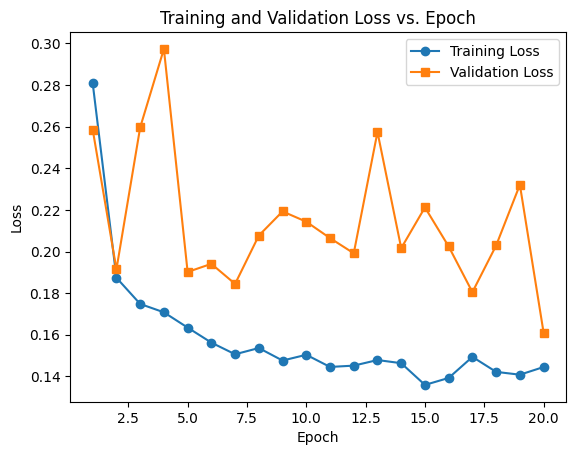

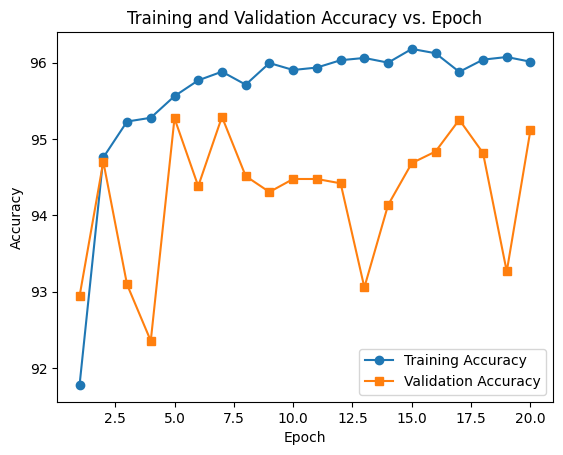

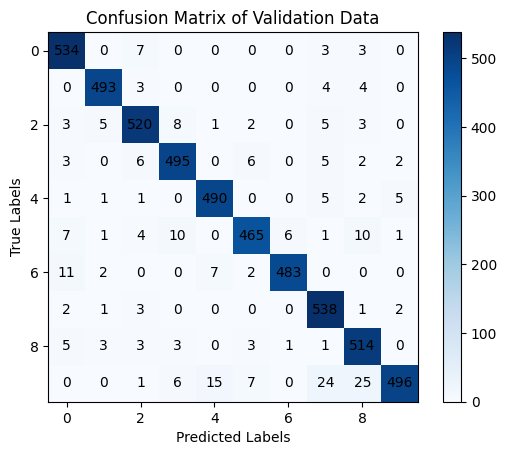



Test Accuracy: 94.81%
Last Training Accuracy: 96.01%
Last Validation Accuracy: 95.12%


-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------


Running with learning rate 0.01, and dropout rate 0.5, number of epochs 20



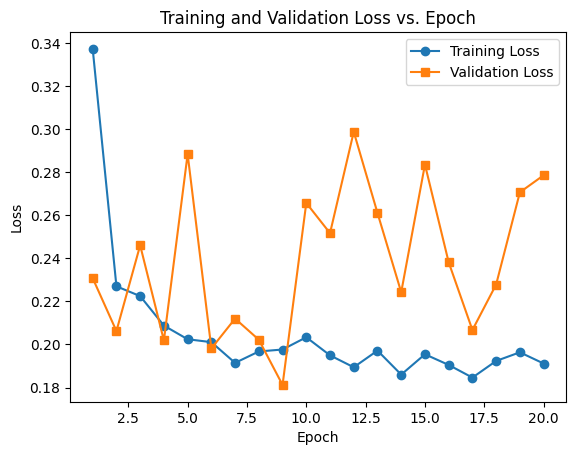

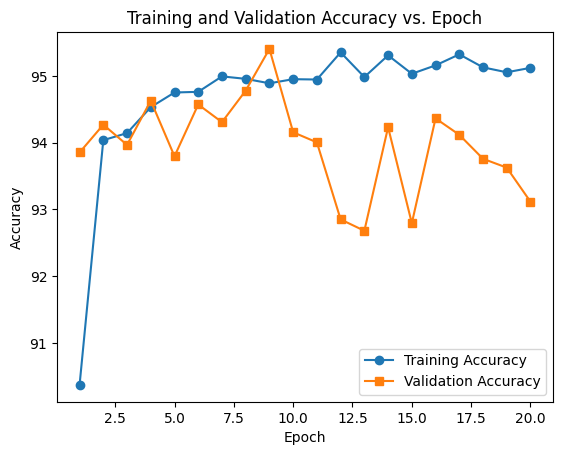

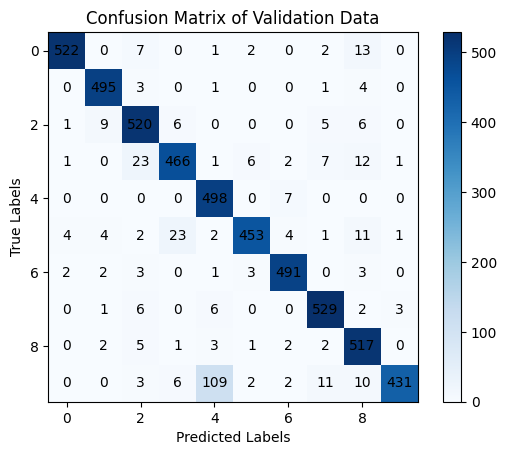



Test Accuracy: 93.68%
Last Training Accuracy: 95.12%
Last Validation Accuracy: 93.11%


-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------


Running with learning rate 0.01, and dropout rate 0.8, number of epochs 20



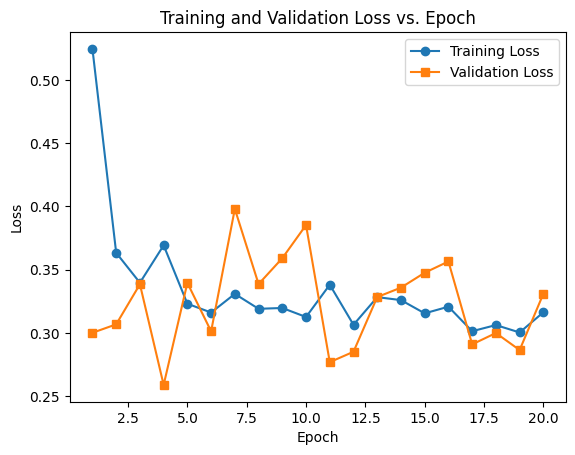

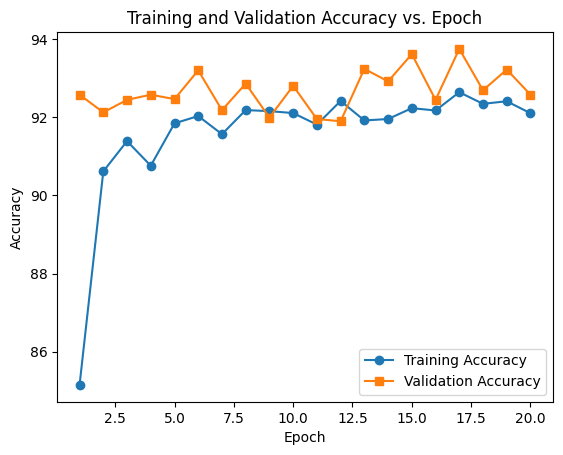

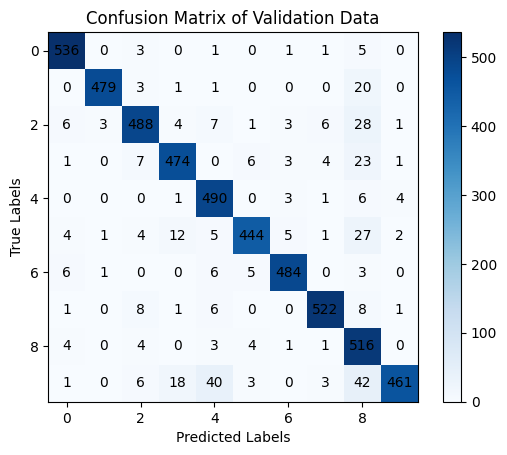



Test Accuracy: 92.25%
Last Training Accuracy: 92.11%
Last Validation Accuracy: 92.58%


-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------


Running with learning rate 0.1, and dropout rate 0, number of epochs 20



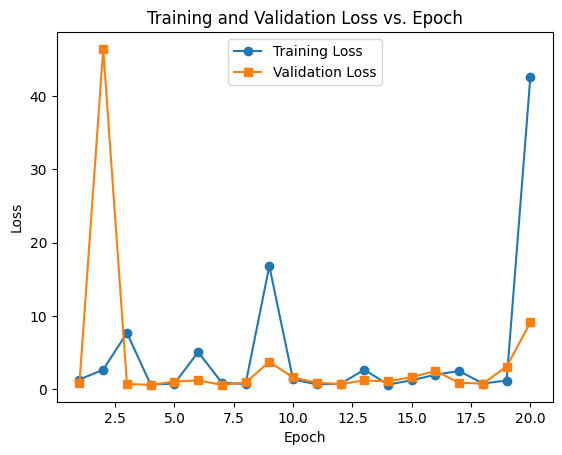

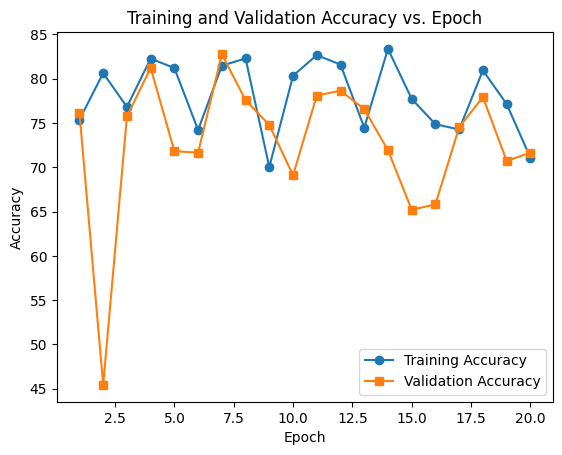

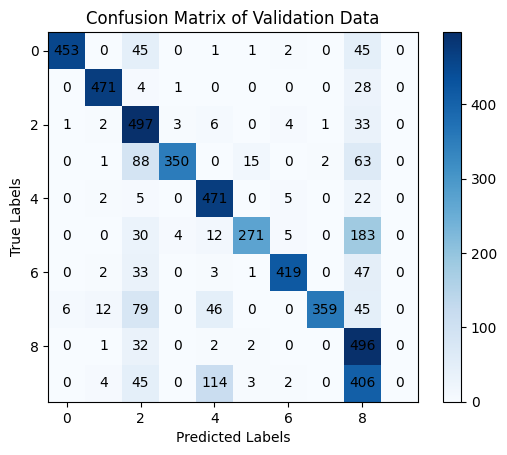



Test Accuracy: 72.81%
Last Training Accuracy: 71.08%
Last Validation Accuracy: 71.64%


-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------


Running with learning rate 0.1, and dropout rate 0.1, number of epochs 20



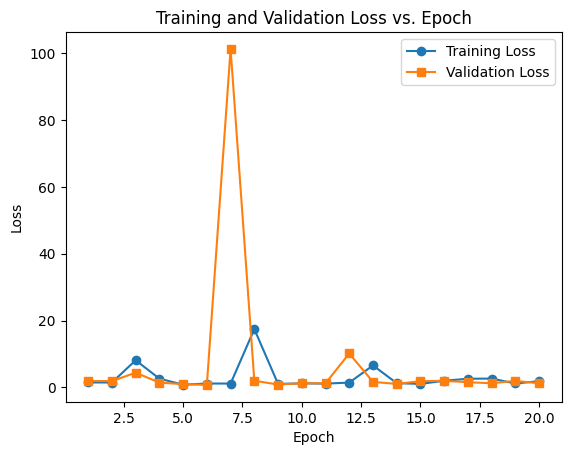

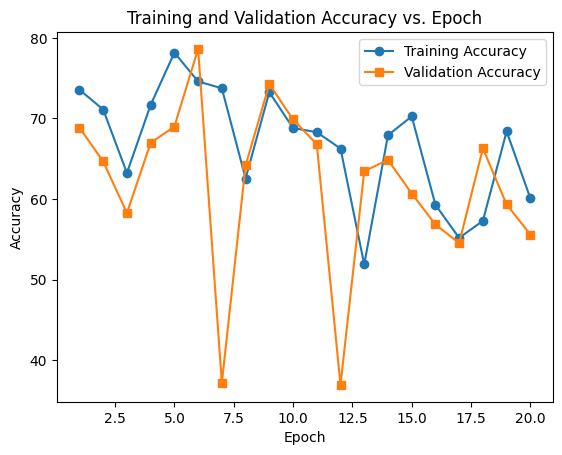

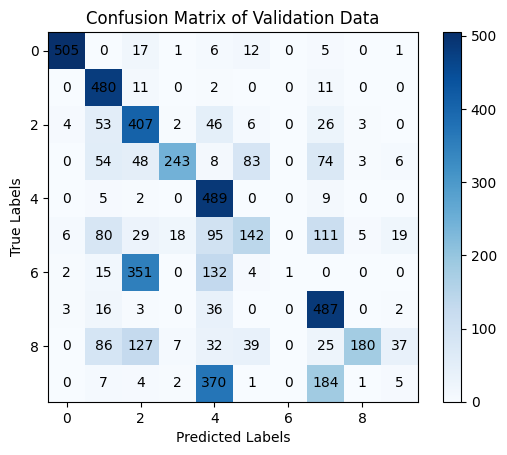



Test Accuracy: 57.64%
Last Training Accuracy: 60.09%
Last Validation Accuracy: 55.60%


-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------


Running with learning rate 0.1, and dropout rate 0.2, number of epochs 20



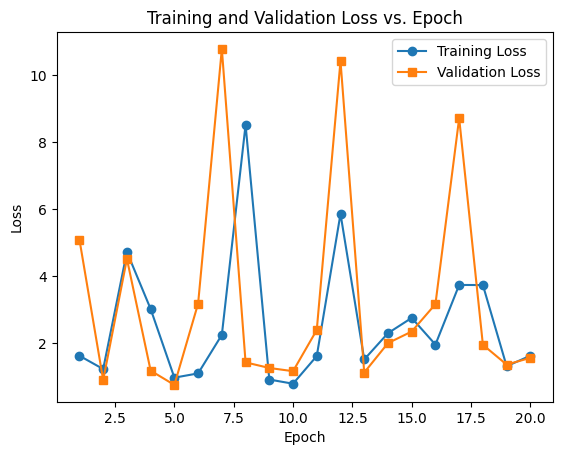

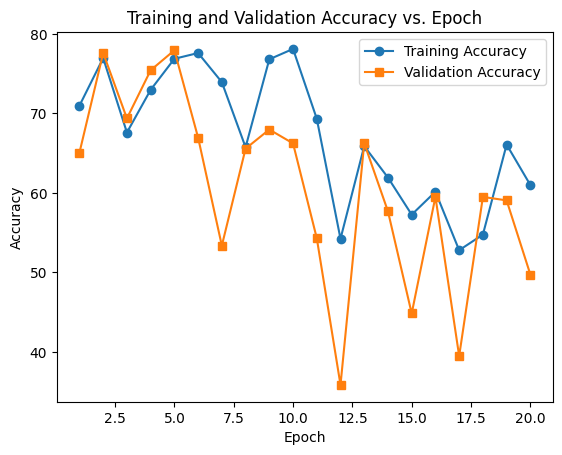

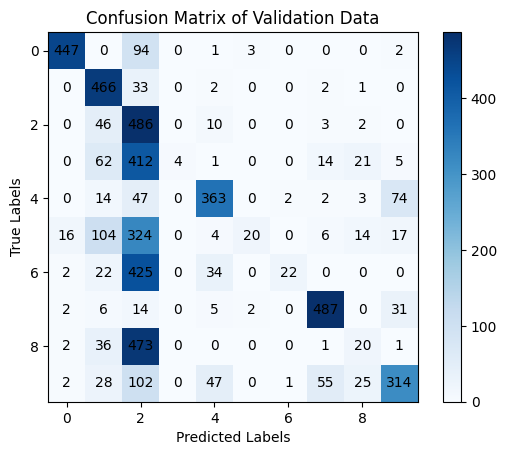



Test Accuracy: 51.39%
Last Training Accuracy: 60.99%
Last Validation Accuracy: 49.74%


-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------


Running with learning rate 0.1, and dropout rate 0.5, number of epochs 20



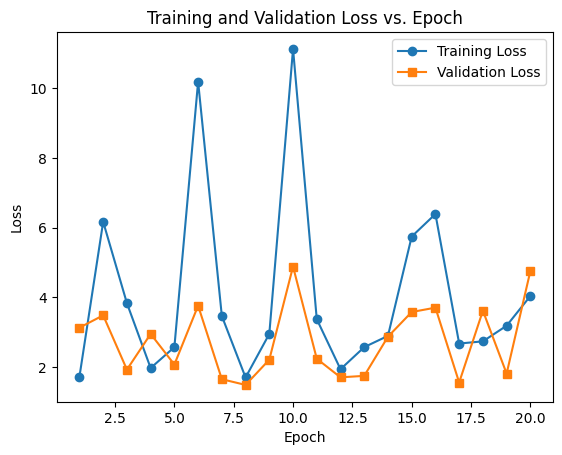

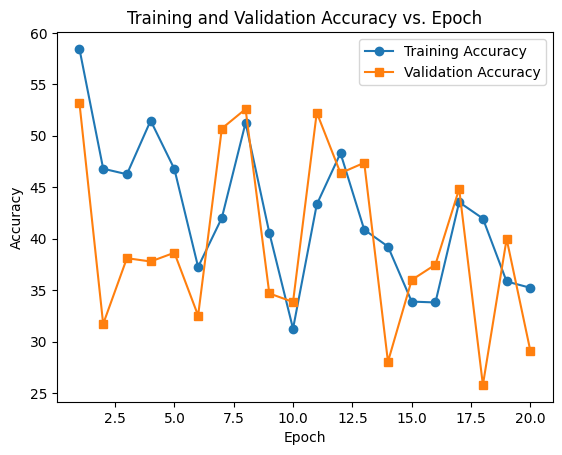

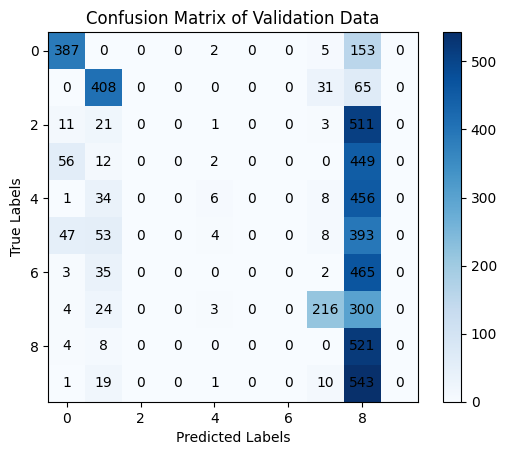



Test Accuracy: 29.08%
Last Training Accuracy: 35.22%
Last Validation Accuracy: 29.10%


-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------


Running with learning rate 0.1, and dropout rate 0.8, number of epochs 20



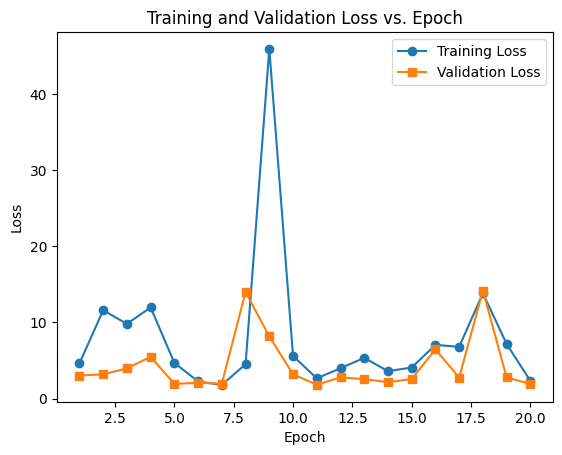

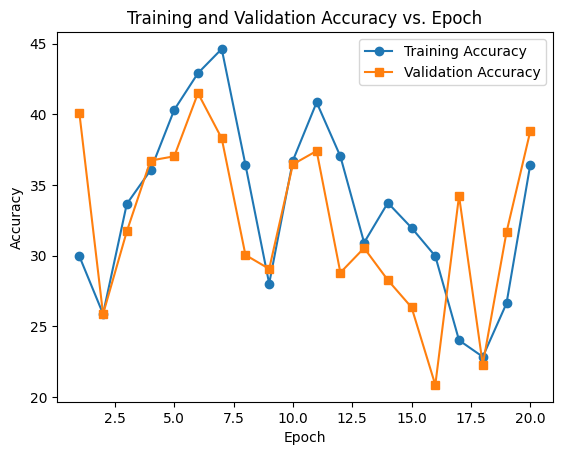

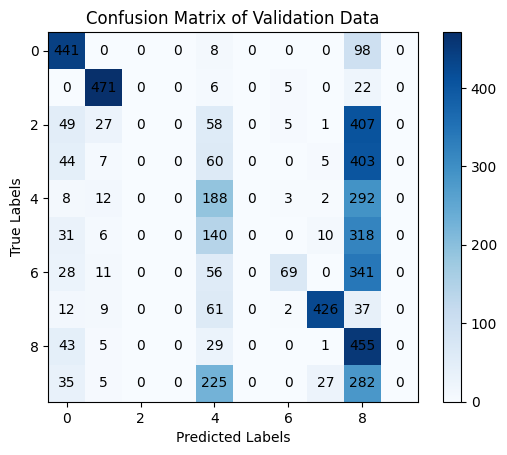



Test Accuracy: 38.66%
Last Training Accuracy: 36.42%
Last Validation Accuracy: 38.78%


-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------



Best Test Accuracy: 97.43%
Best Learning Rate: 0.001
Best Dropout Rate: 0.5


In [124]:
def report(model, optimizer, epochs = 20):
  train_losses = []
  train_accuracies = []
  val_losses = []
  val_accuracies = []
  val_predictions = []
  val_true_labels = []
  for epoch in range(epochs):
    train_average_loss, train_accuracy = train(model, train_loader, optimizer, loss_function, device)
    train_losses.append(train_average_loss)
    train_accuracies.append(train_accuracy)

    val_average_loss, val_accuracy, val_prediction, val_label = validate(model, val_loader, loss_function, device, is_last_epoch = (epoch == (epochs - 1)))
    val_losses.append(val_average_loss)
    val_accuracies.append(val_accuracy)
    val_predictions.extend(val_prediction)
    val_true_labels.extend(val_label)

    # log_to_file(epoch, train_average_loss, val_average_loss, val_accuracy)

  # call plot_loss and compute_confusion matrix function with appropriate parameters
  plot_loss(train_losses, val_losses, epochs)
  print()
  plot_accuracies(train_accuracies, val_accuracies, epochs)
  print()

  # Predictions and labels come from only the validation of the last epoch
  val_confusion_matrix = compute_confusion_matrix(val_predictions, val_true_labels)
  plot_confusion_matrix(val_confusion_matrix)
  print()

  test_loss, test_accuracy, test_predictions, test_true_labels = report_accuracy(test_loader, model)
  # Test confusion matrix
  test_confusion_matrix = compute_confusion_matrix(test_predictions, test_true_labels)

  last_train_accuracy = train_accuracies[-1]
  last_val_accuracy = val_accuracies[-1]
  print(f"\nTest Accuracy: {test_accuracy:.2f}%")
  print(f"Last Training Accuracy: {last_train_accuracy:.2f}%")
  print(f"Last Validation Accuracy: {last_val_accuracy:.2f}%")
  print()
  print()
  print("-----------------------------------------------------------------------------------------")
  print("-----------------------------------------------------------------------------------------")
  print()
  print()
  return test_accuracy, train_accuracies, val_accuracies, train_losses, val_losses, test_loss, val_confusion_matrix, test_confusion_matrix



learning_rates = [0.0001, 0.001, 0.01, 0.1]
dropout_rates = [0, 0.1, 0.2, 0.5, 0.8]
all_test_accuracies = []
all_train_accuracies = []
all_val_accuracies = []
all_train_losses = []
all_val_losses = []
all_test_losses = []
all_val_confusion_matrices = []
all_test_confusion_matrices = []


best_accuracy = 0.0
best_learning_rate = None
best_dropout_rate = None
num_of_epochs = 20
# implement a nested for loop to make a grid search over the given learning_rates and dropout_rates.
for learning_rate in learning_rates:
  for dropout_rate in dropout_rates:
    print(f"Running with learning rate {learning_rate}, and dropout rate {dropout_rate}, number of epochs {num_of_epochs}\n")
    # Initialize model with the given dropout rate
    model = CustomMLP(input_size, output_size, dropout_rate).to(device)
    # Initialize optimizer with the given learning rate
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    # Report for the given parameters
    test_accuracy, train_accuracies, val_accuracies, train_losses, val_losses, test_loss, val_confusion_matrix, test_confusion_matrix = report(model, optimizer, num_of_epochs)
    all_test_accuracies.append(test_accuracy)
    all_train_accuracies.append(train_accuracies)
    all_val_accuracies.append(val_accuracies)
    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)
    all_test_losses.append(test_loss)
    all_val_confusion_matrices.append(confusion_matrix)
    all_test_confusion_matrices.append(test_confusion_matrix)

    if test_accuracy > best_accuracy:
      best_accuracy = test_accuracy
      best_learning_rate = learning_rate
      best_dropout_rate = dropout_rate

print(f"\nBest Test Accuracy: {best_accuracy:.2f}%")
print(f"Best Learning Rate: {best_learning_rate}")
print(f"Best Dropout Rate: {best_dropout_rate}")


### **2.8.2 Choosing best parameters  (5 points)**
You should choose the parameters that give the highest accuracy on the validation data. Then, you should report:
* The training, validation, and test accuracy values.

* Plot training, validation and test losses versus the epoch in single graph.

* Report the confusion matrix for the validation and test data.




Best Validation Accuracy: 97.33%
Best Learning Rate: 0.001
Best Dropout Rate: 0


Report of the model with the best learning rate 0.001, and the best dropot rate 0
Train Accuracy: 99.63%
Validation Accuracy: 97.33%
Test Accuracy: 97.27%



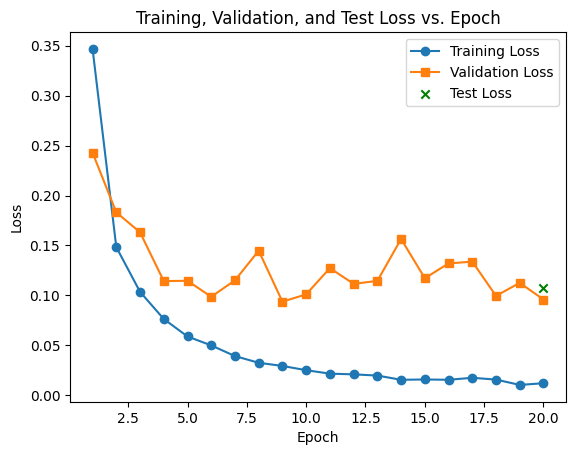

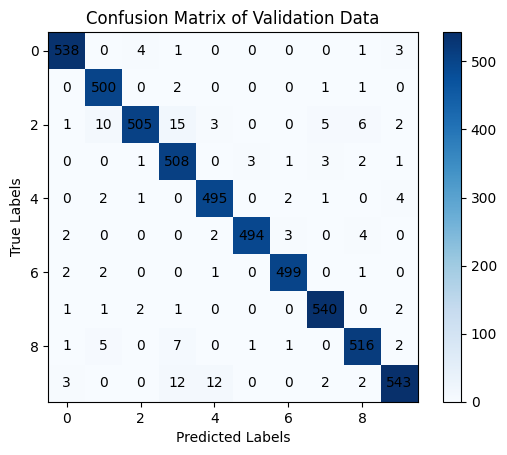

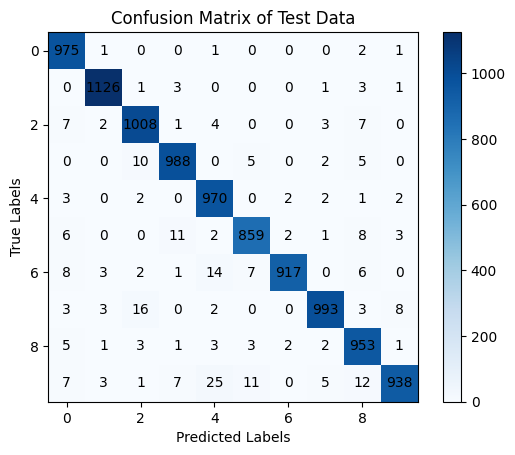

In [133]:
# Find the best parameters that give the highest accuracy on the validation data.
best_validation_accuracy = 0.0
best_learning_rate = None
best_learning_rate_index = 0
best_dropout_rate = None
best_dropout_rate_index = 0
for i in range(len(learning_rates)):
  learning_rate = learning_rates[i]
  for j in range(len(dropout_rates)):
    dropout_rate = dropout_rates[j]
    if all_val_accuracies[i * len(dropout_rates) + j][-1] >= best_validation_accuracy:
      best_validation_accuracy = all_val_accuracies[i * len(dropout_rates) + j][-1]
      best_learning_rate = learning_rate
      best_learning_rate_index = i
      best_dropout_rate = dropout_rate
      best_dropout_rate_index = j
print(f"Best Validation Accuracy: {best_validation_accuracy:.2f}%")
print(f"Best Learning Rate: {best_learning_rate}")
print(f"Best Dropout Rate: {best_dropout_rate}")
print()
print()

# The training, validation, and test accuracy values.
print(f"Report of the model with the best learning rate {best_learning_rate}, and the best dropot rate {best_dropout_rate}")
print(f"Train Accuracy: {all_train_accuracies[best_learning_rate_index * len(dropout_rates) + best_dropout_rate_index][-1]:.2f}%")
print(f"Validation Accuracy: {all_val_accuracies[best_learning_rate_index * len(dropout_rates) + best_dropout_rate_index][-1]:.2f}%")
print(f"Test Accuracy: {all_test_accuracies[best_learning_rate_index * len(dropout_rates) + best_dropout_rate_index]:.2f}%")
print()

# Plot training, validation and test losses versus the epoch in single graph.
x_axis = np.arange(1, num_of_epochs + 1)
y_axis_train = np.array(all_train_losses[best_learning_rate_index * len(dropout_rates) + best_dropout_rate_index])
y_axis_val = np.array(all_val_losses[best_learning_rate_index * len(dropout_rates) + best_dropout_rate_index])
y_point_test = all_test_losses[best_learning_rate_index * len(dropout_rates) + best_dropout_rate_index]
plt.figure()
plt.plot(x_axis, y_axis_train, label='Training Loss', marker='o')
plt.plot(x_axis, y_axis_val, label='Validation Loss', marker='s')
plt.scatter([num_of_epochs], [y_point_test], color='g', marker='x', label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss vs. Epoch')
plt.legend()
plt.show()
print()

#Report the confusion matrix for the validation and test data.
plot_confusion_matrix(all_val_confusion_matrices[best_learning_rate_index * len(dropout_rates) + best_dropout_rate_index])
print()
plot_confusion_matrix(all_test_confusion_matrices[best_learning_rate_index * len(dropout_rates) + best_dropout_rate_index], 'Confusion Matrix of Test Data')
print()

### **2.8.3 Discuss your results (15 points)**
In this section, you should discuss your results with respect to overfitting/underfitting and the impact of the hyper-parameters.

**Write your discussion here**

The model has a high training accuracy, which may indicate overfitting. But there is only a slight drop to validation and test accuracy (2-3%). This little drop indicates that there is not a significant overfitting and the model generalizes well for new data. Also all of the accuracies are high that means there is not underfitting.


*   Learning Rate (0.001): Provides stable convergence and it is enough to converge a high accuracy with 20 epochs. So it is a good choice good choice to balance speed of convergence and stability.
*   Dropout (0): The best performance is achieved without dropout. This suggests that the model does not require additional technique to prevent overfitting. Learning rate and number of epochs are enough to prevent it.

